# Task 1: Prediction using Supervised ML

## Problem Statement : Predict the percentage of a student based on number of study hours.

### Created By : **Ajinkya Jadhav**

## Data Reading

In [1]:
# Load the required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# required library to build a model
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [2]:
# read the dataset 
data = pd.read_csv('student_scores - student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# check the shape of data 
data.shape

(25, 2)

There are **25 observations** with **2 columns** out of which `Scores` is a target column.

In [4]:
# is there missing value present?
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

There is **no missing value** present in the dataset.

In [5]:
# datatype of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


`Hours` of `float` and `Scores` of `int` datatype.

In [6]:
# statistical represetation
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Exploratory Data Analysis

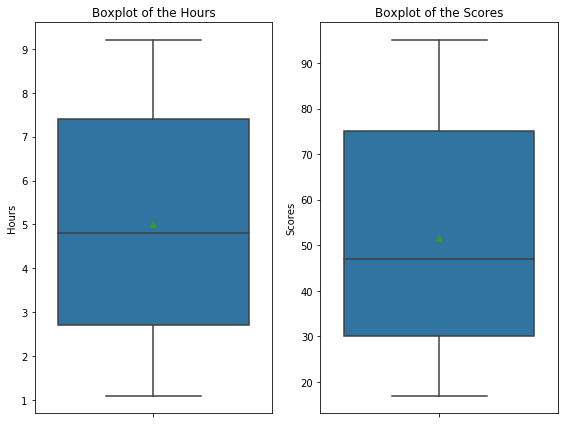

In [7]:
# plot the boxplot 
plt.figure(figsize=(8,6))
for i, col in enumerate(data.columns):
    plt.subplot(1, 2, i+1)
    sns.boxplot(data[col], orient= 'v', showmeans=True);
    plt.title("Boxplot of the {}".format(col))

plt.tight_layout()
plt.show()

#### Observation:
- **Median** and **Mean** value of `Hours` feature approximately close.
- **Median** and **Mean** value of `Scores` clearly different.

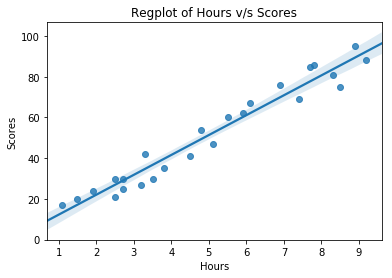

In [8]:
# regplot of Scores against Hours
sns.regplot(x= 'Hours', 
           y = 'Scores',
           data = data);
plt.title("Regplot of Hours v/s Scores");

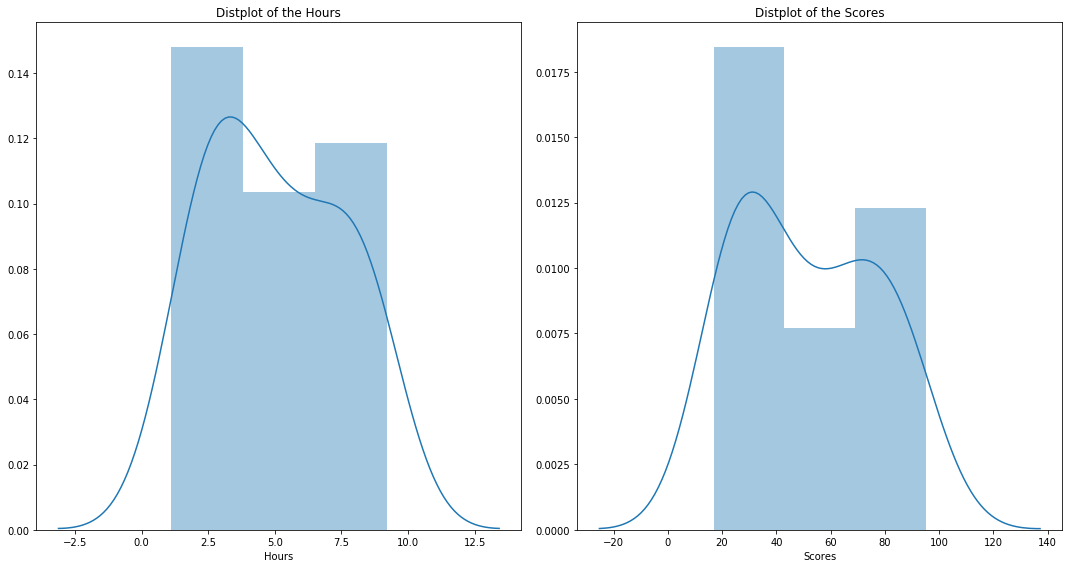

In [9]:
# distribution plot 
plt.figure(figsize=(15, 8))
for i, col in enumerate(data.columns):
    plt.subplot(1, 2, i+1)
    sns.distplot(a = data[col])
    plt.title("Distplot of the {}".format(col))
    
plt.tight_layout()
plt.show()

#### Observation:
- Both the columns are **normally distributed** and no **skewness** present.

In [10]:
# stattistical way to check the skewness 
data.skew()

Hours     0.190338
Scores    0.233965
dtype: float64

#### Observation:
- Since both the columns skewness is in the range between -0.5 and 0.5 then it is **approx. symmetrically distributed**.

## Model Building

In [11]:
X = data['Hours']
y = data['Scores']
X = sm.add_constant(X) # add constant
# model
results = sm.OLS(endog= y, exog = X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Fri, 16 Apr 2021   Prob (F-statistic):           9.13e-17
Time:                        16:05:57   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.3

####  Looking at some key statistics from the summary

The values we are concerned with are - 
1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

##### 1. The coefficient for Hours is 9.7758, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance. 

##### 2. R - squared is 0.953
Meaning that 95.3% of the variance in `Scores` is explained by `Hours`

This is a decent R-squared value.

###### 3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

---
The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

$ Scores = 2.4837 + 9.7758 \times Hours $

#### Interpretation of the model:
- If you keep other features constant and you increased `Hours` by 1 unit then your score will **improved** by 9.7758 unit. 

In [12]:
y_pred = results.predict(exog = X)

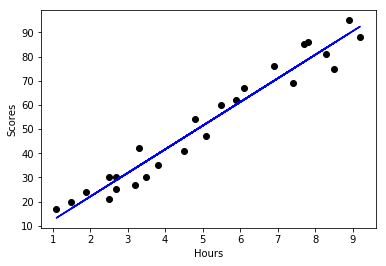

In [13]:
# Plot outputs
plt.scatter(data['Hours'], data['Scores'],  color='black')
plt.plot(data['Hours'], y_pred, color='blue')
plt.xticks()
plt.yticks()
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()